In [1]:
# improved but find something wrong
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("Features/Features_20201109.csv")

In [3]:
print(data.head)

<bound method NDFrame.head of         tempRMS_S1  tempRMS_S2   tempZCR_S1    tempZCR_S2  tempCent_S1  \
0         0.094859    0.182528   822.333333    545.666667     0.240655   
1         0.088845    0.087462   912.000000    611.333333    -0.143705   
2         0.092669    0.069153   861.000000    720.666667     0.490924   
3         0.096996    0.072105   792.000000    832.333333     0.926613   
4         0.090164    0.067022   830.666667    999.000000     0.573376   
5         0.092095    0.061067   861.333333    980.666667    -3.166791   
6         0.100100    0.067198   876.333333    843.666667     0.005263   
7         0.103424    0.082434   788.333333    686.000000     0.649789   
8         0.111225    0.086428   628.666667    599.333333     1.062930   
9         0.108735    0.085106   610.000000    563.333333    -1.148964   
10        0.080488    0.076113   912.666667    745.333333     1.124746   
11        0.074950    0.068547  1024.666667    900.333333     0.628710   
12      

In [4]:
column_headers = list(data.columns.values)
print(column_headers)
print(len(column_headers))  

['tempRMS_S1', 'tempRMS_S2', 'tempZCR_S1', 'tempZCR_S2', 'tempCent_S1', 'tempCent_S2', 'tempSpread_S1', 'tempSpread_S2', 'tempSkew_S1', 'tempSkew_S2', 'tempKurt_S1', 'tempKurt_S2', 'tempabsMAX_S1', 'tempabsMax_S2', 'tempabsMIN_S1', 'tempabsMIN_S2', 'tempCorrSens', 'tempCohSens', 'specCent_S1', 'specCent_S2', 'specCrest_S1', 'specCrest_S2', 'specDec_S1', 'specDec_S2', 'specEntr_S1', 'specEntr_S2', 'specFlat_S1', 'specFlat_S2', 'specFlux_S1', 'specFlux_S2', 'specKurt_S1', 'specKurt_S2', 'specRoll_S1', 'specRoll_S2', 'specSkew_S1', 'specSkew_S2', 'specSlope_S1', 'specSlope_S2', 'specSpread_S1', 'specSpread_S2', 'specabsMAX_S1', 'specabsMAX_S2', 'specfMAX_S1', 'specfMAX_S2']
44


In [5]:
# Split the data set into S1 and S2
# data_S1 = data.copy()
# data_S2 = data.copy()
# for column in data:
#     if column.endswith('2') or column.endswith('s'):
#         data_S1.drop(columns=column, inplace=True)
#     if column.endswith('1') or column.endswith('s'):
#         data_S2.drop(columns=column, inplace=True)

# print(data_S1)   # [559845 rows x 21 columns]
# print(data_S2)   # [559845 rows x 21 columns]

In [6]:
# # Get the correlation between sensors
# count = 0
# for n in data['tempCorrSens']:
#     if n >= 0.5:
#         count = count + 1
# print(count)

In [5]:
# compare the correlation of the data
data_S = data.copy()
for column in data:
    if column.endswith('s'):
        data_S.drop(columns=column, inplace=True)
print(data_S.shape)


d = data_S.corr()
print(d)
x = np.array(d)

(559845, 42)
               tempRMS_S1  tempRMS_S2  tempZCR_S1  tempZCR_S2  tempCent_S1  \
tempRMS_S1       1.000000    0.621626   -0.492405   -0.501497     0.000012   
tempRMS_S2       0.621626    1.000000   -0.360969   -0.402011     0.000193   
tempZCR_S1      -0.492405   -0.360969    1.000000    0.929437     0.000218   
tempZCR_S2      -0.501497   -0.402011    0.929437    1.000000     0.000174   
tempCent_S1      0.000012    0.000193    0.000218    0.000174     1.000000   
tempCent_S2     -0.000461   -0.000234   -0.000156   -0.000291     0.000003   
tempSpread_S1    0.003434   -0.000932   -0.005068   -0.005767     0.001354   
tempSpread_S2    0.005003    0.004062   -0.012631   -0.013437    -0.002164   
tempSkew_S1     -0.000296    0.000004    0.000290    0.000241     0.940841   
tempSkew_S2     -0.000504   -0.000317   -0.000139   -0.000261     0.000003   
tempKurt_S1     -0.000394   -0.000123    0.000285    0.000239     0.909235   
tempKurt_S2      0.000504    0.000318    0.000139  

In [6]:
i,j = 0,0
len_S = len(list(data_S.columns.values))
del_list = []
for i in range(len_S):
    for j in range(i+1,len_S):
        if abs(data_S.iloc[:,i].corr(data_S.iloc[:,j])) > 0.6:
            del_list.append(j)
        
print(del_list)   

[1, 34, 38, 39, 33, 34, 35, 39, 3, 16, 17, 22, 23, 24, 25, 30, 31, 36, 37, 38, 39, 40, 16, 17, 22, 23, 24, 25, 30, 31, 36, 37, 38, 39, 8, 10, 9, 11, 10, 11, 13, 17, 22, 23, 24, 25, 30, 31, 36, 37, 38, 39, 40, 22, 23, 24, 25, 30, 31, 36, 37, 38, 39, 41, 22, 23, 24, 25, 30, 31, 36, 38, 24, 25, 30, 31, 36, 37, 38, 39, 25, 30, 31, 36, 37, 38, 39, 30, 31, 36, 37, 38, 39, 35, 32, 33, 31, 36, 37, 38, 39, 36, 37, 38, 39, 39, 38, 39, 37, 38, 39, 38, 39, 39]


In [7]:
from collections import Counter
result = Counter(del_list).most_common(27)
result = np.array(result)
# print(result)
print(result[:,0])

del_arr = sorted(result[:,0])
print(del_arr)

data_S0 = data_S.copy()
data_S0.drop(data_S0.columns[[del_arr]], axis=1, inplace=True)
print(data_S0.shape)

[39 38 36 37 31 30 25 24 22 23 17 34 33 35 16 40 10 11  1  3  8  9 13 41
 32]
[1, 3, 8, 9, 10, 11, 13, 16, 17, 22, 23, 24, 25, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41]
(559845, 17)


/Users/goffery/anaconda3/lib/python3.7/site-packages/pandas/core/indexes/base.py:2081: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = getitem(key)


In [8]:
column_headers0 = list(data_S0.columns.values)
print(column_headers0)
print(len(column_headers0))

['tempRMS_S1', 'tempZCR_S1', 'tempCent_S1', 'tempCent_S2', 'tempSpread_S1', 'tempSpread_S2', 'tempabsMAX_S1', 'tempabsMIN_S1', 'tempabsMIN_S2', 'specCrest_S1', 'specCrest_S2', 'specDec_S1', 'specDec_S2', 'specFlux_S1', 'specFlux_S2', 'specKurt_S1', 'specKurt_S2']
17


In [9]:
# from sklearn.model_selection import train_test_split
# train_data, test_data = train_test_split(data_S1,test_size=.25,random_state=66)

# data split
# print(data_S0.iloc[0,:])

# train_data = data_S0.iloc[0:419883,:]
# test_data = data_S0.iloc[419883:,:]
# print(train_data.shape)
# print(test_data.shape)

tempRMS_S1       9.485906e-02
tempRMS_S2       1.825278e-01
tempCent_S1      2.406553e-01
tempCent_S2     -2.663019e-02
tempSpread_S1    4.282071e-01
tempSpread_S2    0.000000e+00
tempSkew_S1      1.212252e+00
tempSkew_S2     -2.622718e+45
tempabsMAX_S1    3.994085e-01
tempabsMIN_S1    5.223735e-07
tempabsMIN_S2    1.713432e-07
specCrest_S1     1.012463e+04
specCrest_S2     1.804096e+04
specDec_S1      -3.232430e-02
specDec_S2      -6.120680e-02
Name: 0, dtype: float64
(419883, 15)
(139962, 15)


In [9]:
# data split
train_data_concat = data_S0.iloc[0:20000,:]
test_data_concat = data_S0.iloc[20000:30000,:]

for k in range(13):
    train_data_concat = pd.concat([train_data_concat ,data_S0.iloc[(30000+k*40000):(60000+k*40000),:]])
    test_data_concat = pd.concat([test_data_concat ,data_S0.iloc[(60000+k*40000):(70000+k*40000),:]])

train_data_concat = pd.concat([train_data_concat ,data_S0.iloc[550000:,:]])

print(train_data_concat.shape)
print(test_data_concat.shape)

(419845, 17)
(140000, 17)


In [168]:
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()
# train_data_scaled = scaler.fit_transform(train_data)
# test_data_scaled = scaler.transform(test_data)

# print(train_data_scaled.shape)
# print(test_data_scaled.shape)

(419883, 15)
(139962, 15)


In [56]:
# from sklearn.decomposition import PCA

# pca = PCA(n_components=10)      #'mle': Automatically select the number of features
# pca_train_data = pca.fit_transform(train_data_scaled )
# pca_test_data = pca.transform(test_data_scaled)

# print(pca_train_data.shape)
# print(pca_test_data.shape)

(419883, 10)
(139962, 10)


In [57]:
# print(pca_train_data)

[[-1.95433038e+00  3.77937254e-03 -8.94063150e-01 ...  3.31309613e-01
  -3.81338538e-01  3.61672947e-01]
 [-2.94840866e+00  4.90822531e-03 -9.66377761e-01 ...  6.94057035e-02
  -1.14045931e+00  2.56627677e-01]
 [-2.68723280e+00  5.71254349e-03 -1.22598286e+00 ... -1.17058845e+00
   1.46854723e+00  1.51889838e-01]
 ...
 [ 6.33685769e-01  5.13013282e-01 -4.12354754e-01 ... -5.28678631e-01
  -1.15764760e+00 -8.34843062e-01]
 [ 1.04241888e+00  7.01500714e-05 -1.35863369e-01 ...  4.23320992e-01
  -4.90613441e-01 -4.06391714e-01]
 [ 2.24026059e+00 -4.37149322e-03  3.87157341e-01 ...  8.58295883e-01
  -4.97549142e-03 -2.36815886e-01]]


In [58]:
# print(pca.explained_variance_ratio_)  # Judgment contribution rate                        (10 enough-95%)

[0.28350945 0.13986015 0.13382998 0.09952561 0.05509839 0.04782314
 0.04664081 0.04515801 0.04181    0.03211379]


In [10]:
from sklearn.preprocessing import MinMaxScaler
# from sklearn.preprocessing import StandardScaler

# scalers = StandardScaler()
mms = MinMaxScaler(feature_range=(-1, 1))
train_data_scaled = mms.fit_transform(train_data_concat)
test_data_scaled = mms.transform(test_data_concat)

print(train_data_scaled.shape)
print(test_data_scaled.shape)

(419845, 17)
(140000, 17)


In [11]:
len(train_data_scaled)

419845

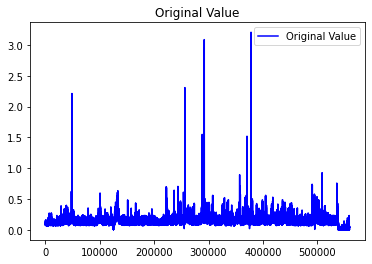

In [13]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(range(len(data)),data.iloc[:,0],'b',label='Original Value')
plt.title('Original Value')
plt.legend()

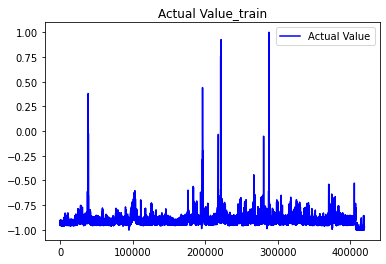

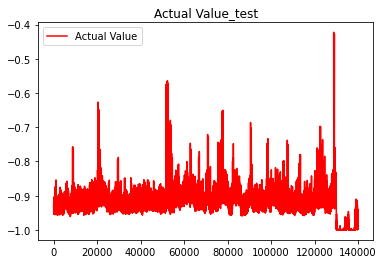

In [14]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(range(len(train_data_scaled)),train_data_scaled[:,0],'b',label='Actual Value')
plt.title('Actual Value_train')
plt.legend()

plt.figure()
plt.plot(range(len(test_data_scaled)),test_data_scaled[:,0],'r',label='Actual Value')
plt.title('Actual Value_test')
plt.legend()

In [15]:
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), :]
        dataX.append(a)
        dataY.append(dataset[i + look_back, :])
    return np.array(dataX), np.array(dataY)

In [16]:
look_back = 3
trainX, trainY = create_dataset(train_data_scaled, look_back)  #trainX.shape=(419879, 3, 10); trainY.shape=(419879, 10)
testX, testY = create_dataset(test_data_scaled, look_back)
print(trainX.shape, trainY.shape)

(419841, 3, 17) (419841, 17)


In [17]:
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 17))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 17))

In [18]:
np.save("trainX.npy",trainX)
np.save("trainY.npy",trainY)
np.save("testX.npy",testX)
np.save("testY.npy",testY)

In [66]:
np.save("trainX_1.npy",trainX[0:20000,:,:])
np.save("trainY_1.npy",trainY[0:20000,:])
np.save("testX_1.npy",testX[20000:25000,:,:])
np.save("testY_1.npy",testY[20000:25000,:])

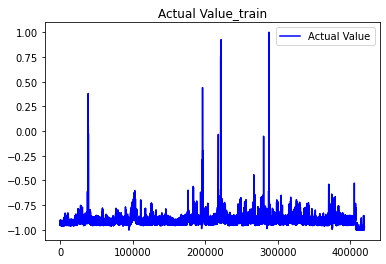

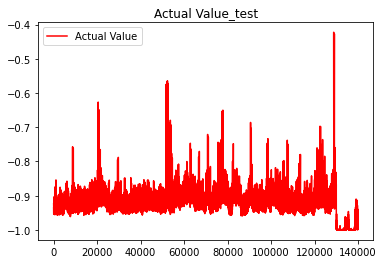

In [19]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(range(len(trainY)),trainY[:,0],'b',label='Actual Value')
plt.title('Actual Value_train')
plt.legend()

plt.figure()
plt.plot(range(len(testY)),testY[:,0],'r',label='Actual Value')
plt.title('Actual Value_test')
plt.legend()

In [23]:
import pandas as pd
import numpy as np

trainX = np.load("trainX.npy")
trainY = np.load("trainY.npy")
testX = np.load("testX.npy")
testY = np.load("testY.npy")

In [33]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import TimeDistributed, RepeatVector
from keras.callbacks import EarlyStopping
#from keras.losses import mean_squared_error
from keras.losses import mean_absolute_error
#from keras.losses import mean_squared_logarithmic_error
#from keras.losses import mean_absolute_percentage_error
from keras.optimizers import Adam

BatchSize = 32

# create and fit the LSTM network
model = Sequential()
# 256-128(0.1) can't realize good fitting 
# model.add(LSTM(28, input_shape=(trainX.shape[1], trainX.shape[2]), kernel_initializer='he_normal')) #reduce the neurons   # activation='tanh' # as default(-1,1)  return_sequences=True,  
model.add(LSTM(28, batch_input_shape=(BatchSize, trainX.shape[1], trainX.shape[2]), stateful=True, kernel_initializer='he_normal')) #reduce the neurons   # activation='tanh' # as default(-1,1)  return_sequences=True,  
model.add(Dropout(0.3))
# model.add(LSTM(64, return_sequences=True))
# model.add(Dropout(0.1))
#model.add(LSTM(16))
#model.add(Dropout(0.3))

model.add(RepeatVector(4))
model.add(TimeDistributed(Dense(5, activation='softmax')))
# model.add(Dense(17))    # original 17


# adams = Adam(lr=0.00001, decay=0.000001)  # lr=0.0001, decay=0.0
model.compile(loss='mean_absolute_error', optimizer= 'sgd')
# 'accuracy' is suitable for classification instead of regression 
print(model.summary())

# Monitor val_loss,start early stopping 
# when the change in 15 consecutive rounds is less than 0.0001
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=50, min_delta=0.0001)
history = model.fit(trainX, trainY, epochs=500, batch_size=BatchSize, verbose=2, validation_data=(testX, testY), callbacks=[es])  #  

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_14 (LSTM)               (32, 28)                  5152      
_________________________________________________________________
dropout_11 (Dropout)         (32, 28)                  0         
_________________________________________________________________
repeat_vector_8 (RepeatVecto (32, 4, 28)               0         
_________________________________________________________________
time_distributed_6 (TimeDist (32, 4, 5)                145       
Total params: 5,297
Trainable params: 5,297
Non-trainable params: 0
_________________________________________________________________
None


ValueError: Error when checking target: expected time_distributed_6 to have 3 dimensions, but got array with shape (419841, 17)

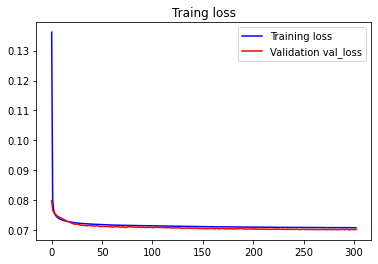

In [20]:
epochs=range(len(history.history['loss']))

# plt.figure()
# plt.plot(epochs,history.history['accuracy'],'b',label='Training accuracy')
# plt.plot(epochs,history.history['val_accuracy'],'r',label='Validation accuracy')
# plt.title('Traing and Validation accuracy')
# plt.legend()
# plt.savefig('model_acc.jpg')


plt.figure()
plt.plot(epochs,history.history['loss'],'b',label='Training loss')
plt.plot(epochs,history.history['val_loss'],'r',label='Validation val_loss')
plt.title('Traing loss')
plt.legend()
plt.savefig('model_loss.jpg')

In [21]:
# summarize performance of the model
scores = model.evaluate(trainX, trainY, verbose=0)
print('Train Score: %.2f MAE' % (scores)) 

Train Score: 0.07 MAE


In [22]:
# make predictions
trainPredict = model.predict(trainX)   # shape: (419879, 20)
testPredict = model.predict(testX)     # shape: (139958, 20)


# trainScore = np.sqrt(mean_squared_error(trainY, trainPredict))
# print('Train Score: %.2f RMSE' % (trainScore))

# testScore = np.sqrt(mean_squared_error(testY, testPredict))
# print('Train Score: %.2f RMSE' % (testScore))

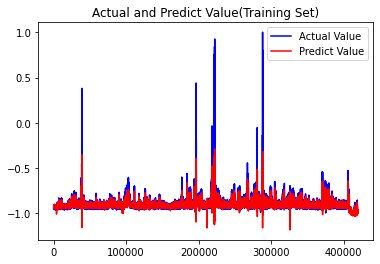

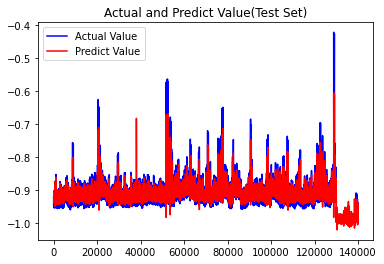

In [4]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(range(len(trainY)),trainY[:,0],'b',label='Actual Value')
plt.plot(range(len(trainPredict)),trainPredict[:,0],'r',label='Predict Value')
plt.title('Actual and Predict Value(Training Set)')
plt.legend()


plt.figure()
plt.plot(range(len(testY)),testY[:,0],'b',label='Actual Value')
plt.plot(range(len(testPredict)),testPredict[:,0],'r',label='Predict Value')
plt.title('Actual and Predict Value(Test Set)')
plt.legend()

In [1]:
np.save("trainPredict.npy",trainPredict)
np.save("trainY.npy",trainY)
np.save("testPredict.npy",testPredict)
np.save("testY.npy",testY)

NameError: name 'np' is not defined

In [1]:
import pandas as pd
import numpy as np

trainPredict = np.load("trainPredict.npy")
trainY = np.load("trainY.npy")
testPredict = np.load("testPredict.npy")
testY = np.load("testY.npy")

In [2]:
# get standard deviation of test predicted value
import numpy as np

std_testPredict = np.std(testPredict, axis = 0)
print(std_testPredict)

[0.02319437 0.20333022 0.00047901 0.00036682 0.00375254 0.00641524
 0.00252703 0.03324706 0.01988735 0.07870246 0.02855323 0.01032298
 0.03971799 0.00134068 0.00148543 0.00258829 0.0024242 ]


In [3]:
threshold = 5

for k in range(len(testPredict[0,:])):
    name = 'err_index_'+str(k)
    locals()[name] = []
    temp = []
    count = 0
    for i in range(1, len(testPredict[:,k])):
        if abs(testPredict[i,k] - testPredict[i-1,k]) > std_testPredict[k]:
            temp.append(i)
            count = count + 1
        else:
            if count > threshold:
                locals()[name].append(temp)
            temp = []
            count = 0

print('Error Index:', err_index_0)

Error Index: [[53662, 53663, 53664, 53665, 53666, 53667], [129121, 129122, 129123, 129124, 129125, 129126], [129818, 129819, 129820, 129821, 129822, 129823]]


In [4]:
print(err_index_16)  # can read from 'err_index_0' - 'err_index_16'

[[53662, 53663, 53664, 53665, 53666, 53667]]


In [5]:
# get the corresponding index,value,name
for l in range(len(testPredict[0,:])):
    index = 'error_index_'+str(l)
    locals()[index] = []
    value = 'value_'+str(l)
    locals()[value] = []
    name = 'err_index_'+str(l)
    for m in locals()[name]:
        for n in m:
            locals()[index].append(n)
            locals()[value].append(testPredict[n,l]) 


In [6]:
list_index = ['tempRMS_S1', 'tempZCR_S1', 'tempCent_S1', 'tempCent_S2', 'tempSpread_S1', 'tempSpread_S2', 'tempabsMAX_S1', 'tempabsMIN_S1', 'tempabsMIN_S2', 'specCrest_S1', 'specCrest_S2', 'specDec_S1', 'specDec_S2', 'specFlux_S1', 'specFlux_S2', 'specKurt_S1', 'specKurt_S2']

In [7]:
list_index[1]

'tempZCR_S1'

No handles with labels found to put in legend.


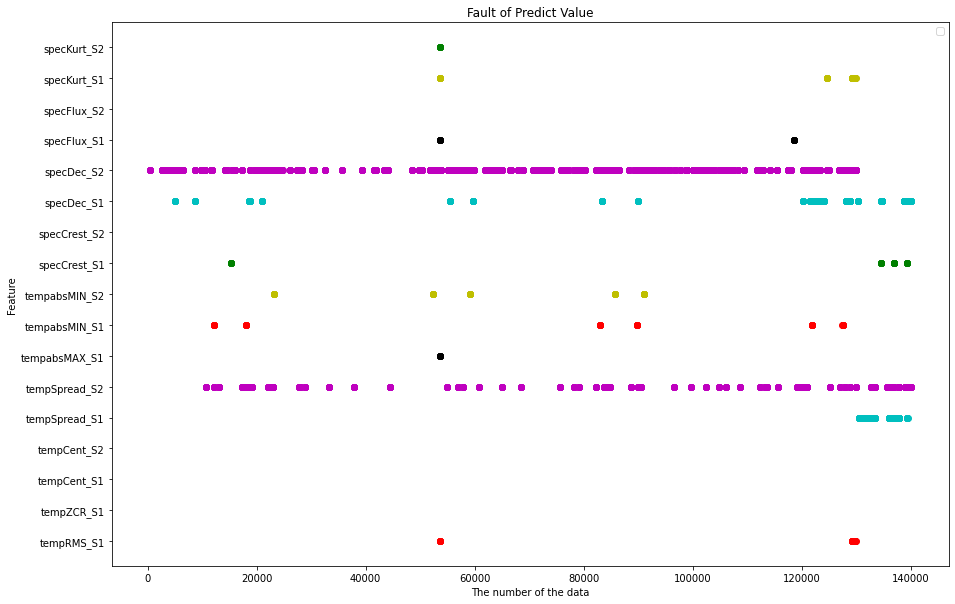

In [9]:
import matplotlib.pyplot as plt

cValue = ['r','y','g','b','c','m','k','r','y','g','b','c','m','k','r','y','g'] 

plt.figure(figsize=(15,10))
for i in range(len(testPredict[0,:])):
    index = 'error_index_'+str(i)
    plt.scatter(locals()[index], i * np.ones(len(locals()[index])), c=cValue[i], marker = 'o')

plt.yticks(range(len(testPredict[0,:])),list_index)
plt.xlabel('The number of the data')
plt.ylabel('Feature')
plt.title('Fault of Predict Value')
plt.legend()

In [18]:
# count abnormal points over time

abp_list = []

for m in range(len(testPredict)):
    ab_p = 0
    for i in range(len(testPredict[0,:])):
        index = 'error_index_'+str(i)
        if len(locals()[index])>300:
            pass
        else:
            if m in locals()[index]:
                ab_p = ab_p + 1
    abp_list.append(ab_p)

In [17]:
# for i in range(len(testPredict[0,:])):
#     index = 'error_index_'+str(i)
#     print(len(locals()[index]))

18
0
0
0
254
500
6
37
31
25
0
263
1811
12
0
26
6


No handles with labels found to put in legend.


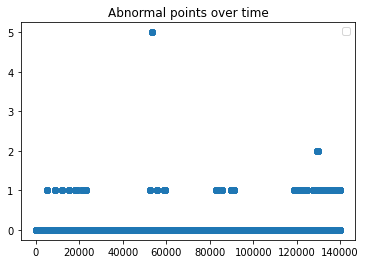

In [19]:
import matplotlib.pyplot as plt

plt.figure()
plt.scatter(range(len(abp_list)),abp_list)
#plt.plot(range(len(testPredict)),abp_list,'b',label='Predict Value')
plt.title('Abnormal points over time')
plt.legend()

No handles with labels found to put in legend.


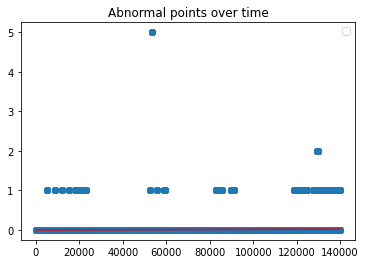

In [28]:
from sklearn.linear_model import LinearRegression

variable_x = np.array(range(len(abp_list))).reshape(-1, 1)

linear_model = LinearRegression()
linear_model.fit(variable_x, abp_list)
linear_model.score(variable_x, abp_list)

alpha = linear_model.intercept_   #View intercept
beta = linear_model.coef_      #View parameters


x = np.linspace(0, len(abp_list))

y = beta *x+ alpha


import matplotlib.pyplot as plt

plt.figure()
plt.scatter(range(len(abp_list)),abp_list)
plt.plot(x,y,c='r')

plt.title('Abnormal points over time')
plt.legend()

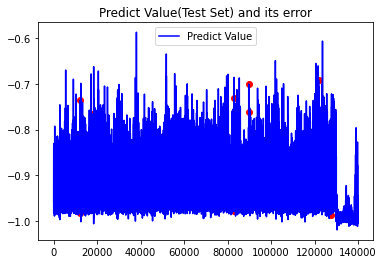

In [17]:
import matplotlib.pyplot as plt

plt.figure()
plt.scatter(error_index_7, value_7, c='r')
plt.plot(range(len(testPredict)),testPredict[:,7],'b',label='Predict Value')
plt.title('Predict Value(Test Set) and its error')
plt.legend()

In [7]:
# get all error index here
index_all = []
for a in range(len(testPredict[0,:])):
    index = 'error_index_'+str(a)
    index_all = index_all + locals()[index]
# print(index_all) 


In [8]:
# Find the most frequent index
from collections import Counter
error = Counter(index_all).most_common(30)  # threshold = 5: 30/5=6 means 6 faults
error = np.array(error)
# print(result)
print(error[:,0])

[ 53662  53663  53664  53665  53666  53667 129121 129122 129123 129124
 129125 128804 128805 128806 128807 128808 129126 129818 129819 129820
 129821 129822 129823 132592 132593 132594 132595 132596 132597 136243]


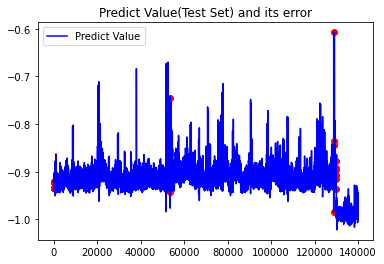

In [10]:
# Plot the final error index

column = 0    # choose the column that you want to see
value_error = []

for b in error:
    value_error.append(testPredict[b,column])
    
#import matplotlib.pyplot as plt
plt.figure()
plt.scatter(error, value_error, c='r')
plt.plot(range(len(testPredict)),testPredict[:,column],'b',label='Predict Value')
plt.title('Predict Value(Test Set) and its error')
plt.legend()

In [46]:
# testScore = np.zeros(len(testPredict))

# for k in range(len(testPredict)):
#     # testScore[k] = np.sqrt(mean_squared_error(testY[k,:], testPredict[k,:]))
#     testScore[k] = mean_absolute_error(testY[k,:], testPredict[k,:])
    
# print(testScore)
#     #print('Test Score: %.2f RMSE' % (testScore))

[0.02606589 0.11340884 0.1610921  ... 0.08830211 0.10356636 0.08184026]


In [47]:
# print(testScore.shape)

(139996,)


In [55]:
# # get error index
# err_index = []
# value = []
# for i in range(len(testScore)):
#     if testScore[i] >= 0.24:
#         err_index.append(i)
#         value.append(testScore[i])
# print(len(err_index))

3


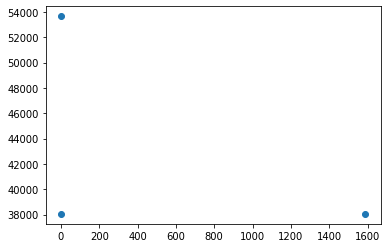

[38055, 38056, 53663]


In [56]:
# #x = np.arange(len(err_index))
# #plt.scatter(x, err_index)  
# plt.scatter(value, err_index)
# plt.show()
# print(err_index)